<a href="https://colab.research.google.com/github/ij1810/test_app/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_file='loan_data_train.csv'
test_file='loan_data_test.csv'

In [ ]:
ld_train= pd.read_csv(train_file)
ld_test= pd.read_csv(test_file)

In [ ]:
ld_test['Interest.Rate']=np.nan
ld_train['coming from']='train'
ld_test['coming from']='test'

In [ ]:
ld_all=pd.concat([ld_train,ld_test])

In [ ]:
ld_all.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming from
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [ ]:
ld_train.shape, ld_test.shape

((2200, 16), (300, 16))

In [ ]:
ld_all.shape

(2500, 16)

In [ ]:
ld_all.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming from                        object
dtype: object

In [ ]:
ld_all.drop(['ID'],axis=1,inplace=True)

In [ ]:
ld_all.shape

(2500, 15)

In [ ]:
ld_all.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming from
0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [ ]:
ld_all['Interest.Rate'] = ld_all['Interest.Rate'].str.replace("%",'')

In [ ]:
for column in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[column]=ld_all[column].str.replace('%','')

In [ ]:
ld_all['Interest.Rate'], ld_all['Debt.To.Income.Ratio']

(0      18.49
 1      17.27
 2      14.33
 3      16.29
 4      12.23
        ...  
 295      NaN
 296      NaN
 297      NaN
 298      NaN
 299      NaN
 Name: Interest.Rate, Length: 2500, dtype: object,
 0      27.56
 1      13.39
 2       3.50
 3      19.62
 4      23.79
        ...  
 295    13.91
 296    17.22
 297     9.09
 298    12.85
 299     7.64
 Name: Debt.To.Income.Ratio, Length: 2500, dtype: object)

In [ ]:
ld_all.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming from                        object
dtype: object

In [ ]:
def get_non_numeric(series):
    non_numeric_elements=[]
    for elem in series:
        try:
            float(elem)
        except:
            non_numeric_elements.append(elem)
    return(non_numeric_elements)

In [ ]:
for col in ['Amount.Requested','Amount.Funded.By.Investors','Interest.Rate','Debt.To.Income.Ratio','Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    non_numeric_elements=get_non_numeric(ld_all[col])
    print('*********************************')
    print('Column :', col)
    print('Non numeric elements :', non_numeric_elements)

*********************************
Column : Amount.Requested
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Amount.Funded.By.Investors
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Interest.Rate
Non numeric elements : []
*********************************
Column : Debt.To.Income.Ratio
Non numeric elements : []
*********************************
Column : Open.CREDIT.Lines
Non numeric elements : ['.', '.', '.', '.', '.']
*********************************
Column : Revolving.CREDIT.Balance
Non numeric elements : ['.', '.']


In [ ]:
for col in ['Amount.Requested','Amount.Funded.By.Investors','Interest.Rate','Debt.To.Income.Ratio','Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    ld_all[col]=pd.to_numeric(ld_all[col], errors='coerce')

In [ ]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming from                        object
dtype: object

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2499 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2499 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2497 non-null   float64
 9   FICO.Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2491 non-null   float64
 11  Revolving.CREDIT.Balance        2495 non-null   float64
 12  Inquiries.in.the.Last.6.Months  249

In [ ]:
ld_all['FICO.Range']

0      720-724
1      710-714
2      690-694
3      710-714
4      730-734
        ...   
295    705-709
296    705-709
297    670-674
298    675-679
299    675-679
Name: FICO.Range, Length: 2500, dtype: object

In [ ]:
k = ld_all['FICO.Range'].str.split('-',expand=True)

In [ ]:
k

,0,1
0,720,724
1,710,714
2,690,694
3,710,714
4,730,734
...,...,...
295,705,709
296,705,709
297,670,674
298,675,679


In [ ]:
k.columns = ['min_fico','max_fico']

In [ ]:
k['min_fico']=pd.to_numeric(k['min_fico'])
k['max_fico']=pd.to_numeric(k['max_fico'])

In [ ]:
k['avg_fico']=(k['min_fico']+k['max_fico'])/2

In [ ]:
k

,min_fico,max_fico,avg_fico
0,720,724,722.0
1,710,714,712.0
2,690,694,692.0
3,710,714,712.0
4,730,734,732.0
...,...,...,...
295,705,709,707.0
296,705,709,707.0
297,670,674,672.0
298,675,679,677.0


In [ ]:
ld_all['FICO.Range']=k['avg_fico']

ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming from
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5 years,train
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4 years,train
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,692.0,13.0,893.0,1.0,< 1 year,train
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,712.0,12.0,38194.0,1.0,10+ years,train
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,732.0,6.0,31061.0,2.0,10+ years,train


In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2499 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2499 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2497 non-null   float64
 9   FICO.Range                      2500 non-null   float64
 10  Open.CREDIT.Lines               2491 non-null   float64
 11  Revolving.CREDIT.Balance        2495 non-null   float64
 12  Inquiries.in.the.Last.6.Months  249

In [ ]:
ld_all.loc[ld_all['coming from']=='train','Home.Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home.Ownership, dtype: int64

In [ ]:
ld_all.loc[ld_all['Home.Ownership'].isna(),'Home.Ownership'] = 'MORTGAGE'

<AxesSubplot:xlabel='Home.Ownership', ylabel='Interest.Rate'>

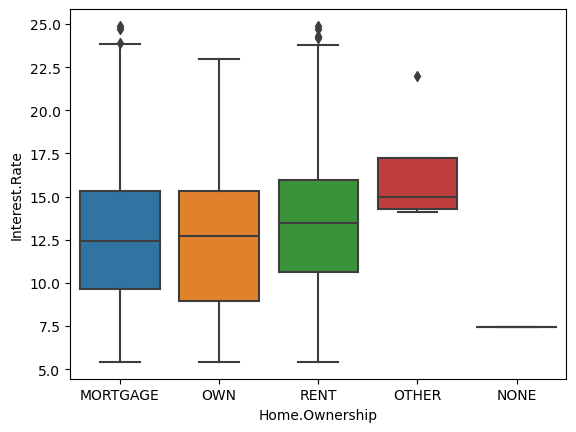

In [ ]:
sns.boxplot(y = ld_all.loc[ld_all['coming from']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['coming from']=='train', 'Home.Ownership'])

In [ ]:
#ld_all.loc[ld_all['Home.Ownership'] == 'OTHER', 'Home.Ownership']='MORTGAGE'
#ld_all.loc[ld_all['Home.Ownership'] == 'NONE', 'Home.Ownership']='MORTGAGE'

In [ ]:
ld_all.loc[ld_all['Home.Ownership'] == 'OTHER', 'Home.Ownership'] = 'MORTGAGE'
ld_all.loc[ld_all['Home.Ownership'] == 'NONE', 'Home.Ownership'] = 'RENT'

In [ ]:
ld_all['Home.Ownership'].value_counts()

MORTGAGE    1153
RENT        1147
OWN          200
Name: Home.Ownership, dtype: int64

In [ ]:
pd.get_dummies(ld_all['Home.Ownership'], prefix='HO')

,HO_MORTGAGE,HO_OWN,HO_RENT
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
295,1,0,0
296,0,1,0
297,0,0,1
298,0,0,1


In [ ]:
k = pd.get_dummies(ld_all['Home.Ownership'], prefix = 'HO')

ld_all.drop(['Home.Ownership'],axis=1,inplace=True)

ld_all = pd.concat([ld_all,k],axis=1)

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2499 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2499 non-null   object 
 7   Monthly.Income                  2497 non-null   float64
 8   FICO.Range                      2500 non-null   float64
 9   Open.CREDIT.Lines               2491 non-null   float64
 10  Revolving.CREDIT.Balance        2495 non-null   float64
 11  Inquiries.in.the.Last.6.Months  2497 non-null   float64
 12  Employment.Length               242

In [ ]:
ld_train['Loan.Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan.Purpose, dtype: int64

<AxesSubplot:xlabel='Loan.Purpose', ylabel='Interest.Rate'>

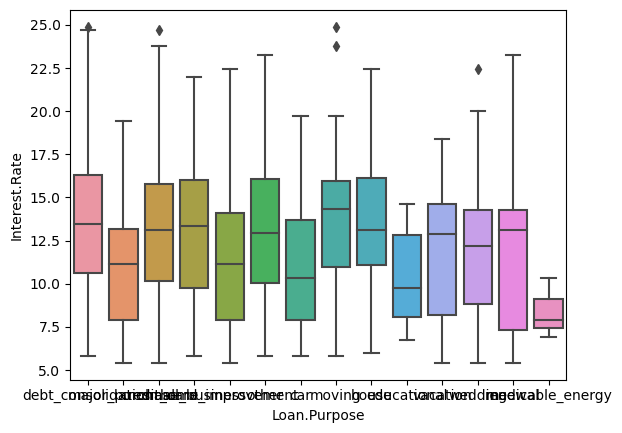

In [ ]:
sns.boxplot(y=ld_all.loc[ld_all['coming from']=='train', 'Interest.Rate'],x=ld_all.loc[ld_all['coming from']=='train', 'Loan.Purpose'])

In [ ]:
ld_all['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [ ]:
ld_all.loc[ld_all['Loan.Purpose'].isna(),'Loan.Purpose'] = 'debt_consolidation'

In [ ]:
k = pd.get_dummies(ld_all['Loan.Purpose'], prefix='Loan_purpose')
ld_all.drop(['Loan.Purpose'],axis=1, inplace=True)
ld_all=pd.concat([ld_all,k],axis=1)

In [ ]:
ld_all['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [ ]:
k = pd.get_dummies(ld_all['Employment.Length'], prefix='Employment.Length')
ld_all.drop(['Employment.Length'],axis=1, inplace=True)
ld_all=pd.concat([ld_all,k],axis=1)

In [ ]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Loan.Length                         object
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
FICO.Range                         float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
coming from                         object
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpos

In [ ]:
ld_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [ ]:
ld_all.loc[ld_all['Loan.Length'].isna(), 'Loan.Length']='36 months'
ld_all.loc[ld_all['Loan.Length']=='.', 'Loan.Length']='60 months'

<AxesSubplot:xlabel='Loan.Length', ylabel='Interest.Rate'>

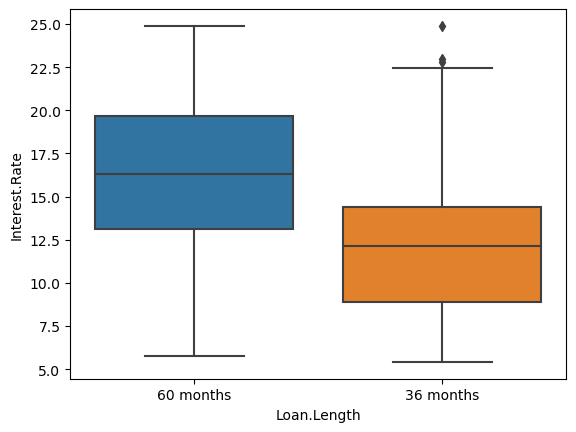

In [ ]:
sns.boxplot(y=ld_all.loc[ld_all['coming from']=='train', 'Interest.Rate'], x=ld_all.loc[ld_all['coming from']=='train', 'Loan.Length'])

In [ ]:
k = pd.get_dummies(ld_all['Loan.Length'], prefix = 'LL')

ld_all.drop(['Loan.Length'], axis=1, inplace=True)

ld_all = pd.concat([ld_all, k], axis=1)

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2495 non-null   float64
 1   Amount.Funded.By.Investors       2495 non-null   float64
 2   Interest.Rate                    2200 non-null   float64
 3   Debt.To.Income.Ratio             2499 non-null   float64
 4   State                            2499 non-null   object 
 5   Monthly.Income                   2497 non-null   float64
 6   FICO.Range                       2500 non-null   float64
 7   Open.CREDIT.Lines                2491 non-null   float64
 8   Revolving.CREDIT.Balance         2495 non-null   float64
 9   Inquiries.in.the.Last.6.Months   2497 non-null   float64
 10  coming from                      2500 non-null   object 
 11  HO_MORTGAGE                      2500 non-null   uint8  
 12  HO_OWN               

In [ ]:
ld_all['State'].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
.       1
IA      1
Name: State, dtype: int64

In [ ]:
k=pd.get_dummies(ld_all['State'],prefix='state')
ld_all.drop(['State'],axis=1,inplace=True)
ld_all=pd.concat([ld_all,k],axis=1)

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 88 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2495 non-null   float64
 1   Amount.Funded.By.Investors       2495 non-null   float64
 2   Interest.Rate                    2200 non-null   float64
 3   Debt.To.Income.Ratio             2499 non-null   float64
 4   Monthly.Income                   2497 non-null   float64
 5   FICO.Range                       2500 non-null   float64
 6   Open.CREDIT.Lines                2491 non-null   float64
 7   Revolving.CREDIT.Balance         2495 non-null   float64
 8   Inquiries.in.the.Last.6.Months   2497 non-null   float64
 9   coming from                      2500 non-null   object 
 10  HO_MORTGAGE                      2500 non-null   uint8  
 11  HO_OWN                           2500 non-null   uint8  
 12  HO_RENT              

<AxesSubplot:xlabel='Monthly.Income', ylabel='Count'>

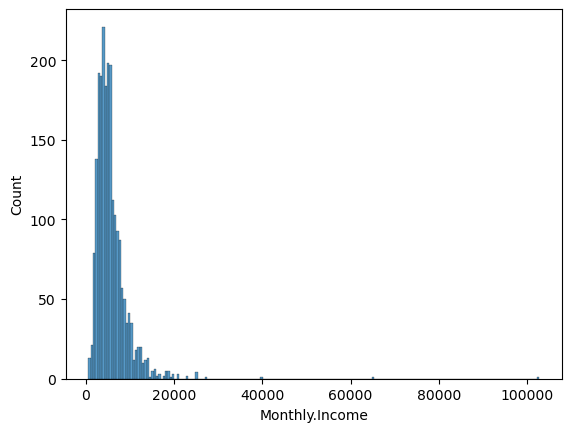

In [ ]:
sns.histplot(ld_all.loc[ld_all['coming from']=='train', 'Monthly.Income'])

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train', 'Monthly.Income'].median()

In [ ]:
ld_all.loc[ld_all['Monthly.Income'].isna(), 'Monthly.Income']=median_val

<AxesSubplot:xlabel='Amount.Requested', ylabel='Count'>

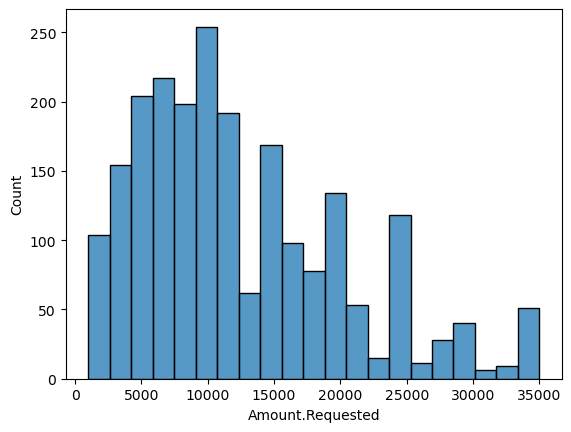

In [ ]:
sns.histplot(ld_all.loc[ld_all['coming from']=='train', 'Amount.Requested'])

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train', 'Amount.Requested'].median()

In [ ]:
ld_all.loc[ld_all['Amount.Requested'].isna(), 'Amount.Requested']=median_val

<AxesSubplot:xlabel='Amount.Funded.By.Investors', ylabel='Count'>

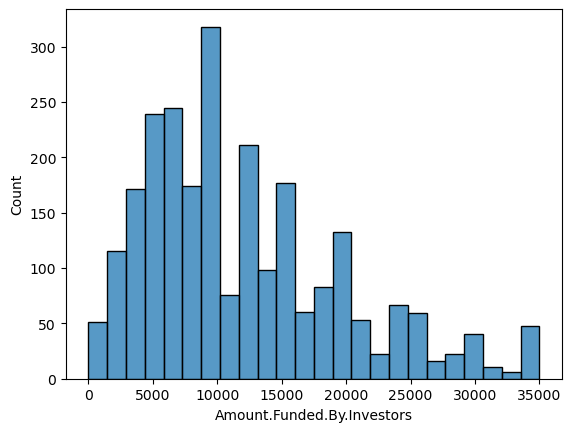

In [ ]:
sns.histplot(ld_all.loc[ld_train['coming from']=='train', 'Amount.Funded.By.Investors'])

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train', 'Amount.Funded.By.Investors'].median()

In [ ]:
ld_all.loc[ld_all['Amount.Funded.By.Investors'].isna(), 'Amount.Funded.By.Investors']=median_val

In [ ]:
ld_all['Debt.To.Income.Ratio'].isnull().sum()

1

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train','Debt.To.Income.Ratio'].median()

In [ ]:
ld_all.loc[ld_all['Debt.To.Income.Ratio'].isna(), 'Debt.To.Income.Ratio']=median_val

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train','Open.CREDIT.Lines'].median()

In [ ]:
ld_all.loc[ld_all['Open.CREDIT.Lines'].isna(), 'Open.CREDIT.Lines']=median_val

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train','Revolving.CREDIT.Balance'].median()

In [ ]:
ld_all.loc[ld_all['Revolving.CREDIT.Balance'].isna(), 'Revolving.CREDIT.Balance']=median_val

In [ ]:
median_val=ld_all.loc[ld_all['coming from']=='train', 'Inquiries.in.the.Last.6.Months'].median()

In [ ]:
ld_all.loc[ld_all['Inquiries.in.the.Last.6.Months'].isna(), 'Inquiries.in.the.Last.6.Months']=median_val

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 88 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2500 non-null   float64
 1   Amount.Funded.By.Investors       2500 non-null   float64
 2   Interest.Rate                    2200 non-null   float64
 3   Debt.To.Income.Ratio             2500 non-null   float64
 4   Monthly.Income                   2500 non-null   float64
 5   FICO.Range                       2500 non-null   float64
 6   Open.CREDIT.Lines                2500 non-null   float64
 7   Revolving.CREDIT.Balance         2500 non-null   float64
 8   Inquiries.in.the.Last.6.Months   2500 non-null   float64
 9   coming from                      2500 non-null   object 
 10  HO_MORTGAGE                      2500 non-null   uint8  
 11  HO_OWN                           2500 non-null   uint8  
 12  HO_RENT              

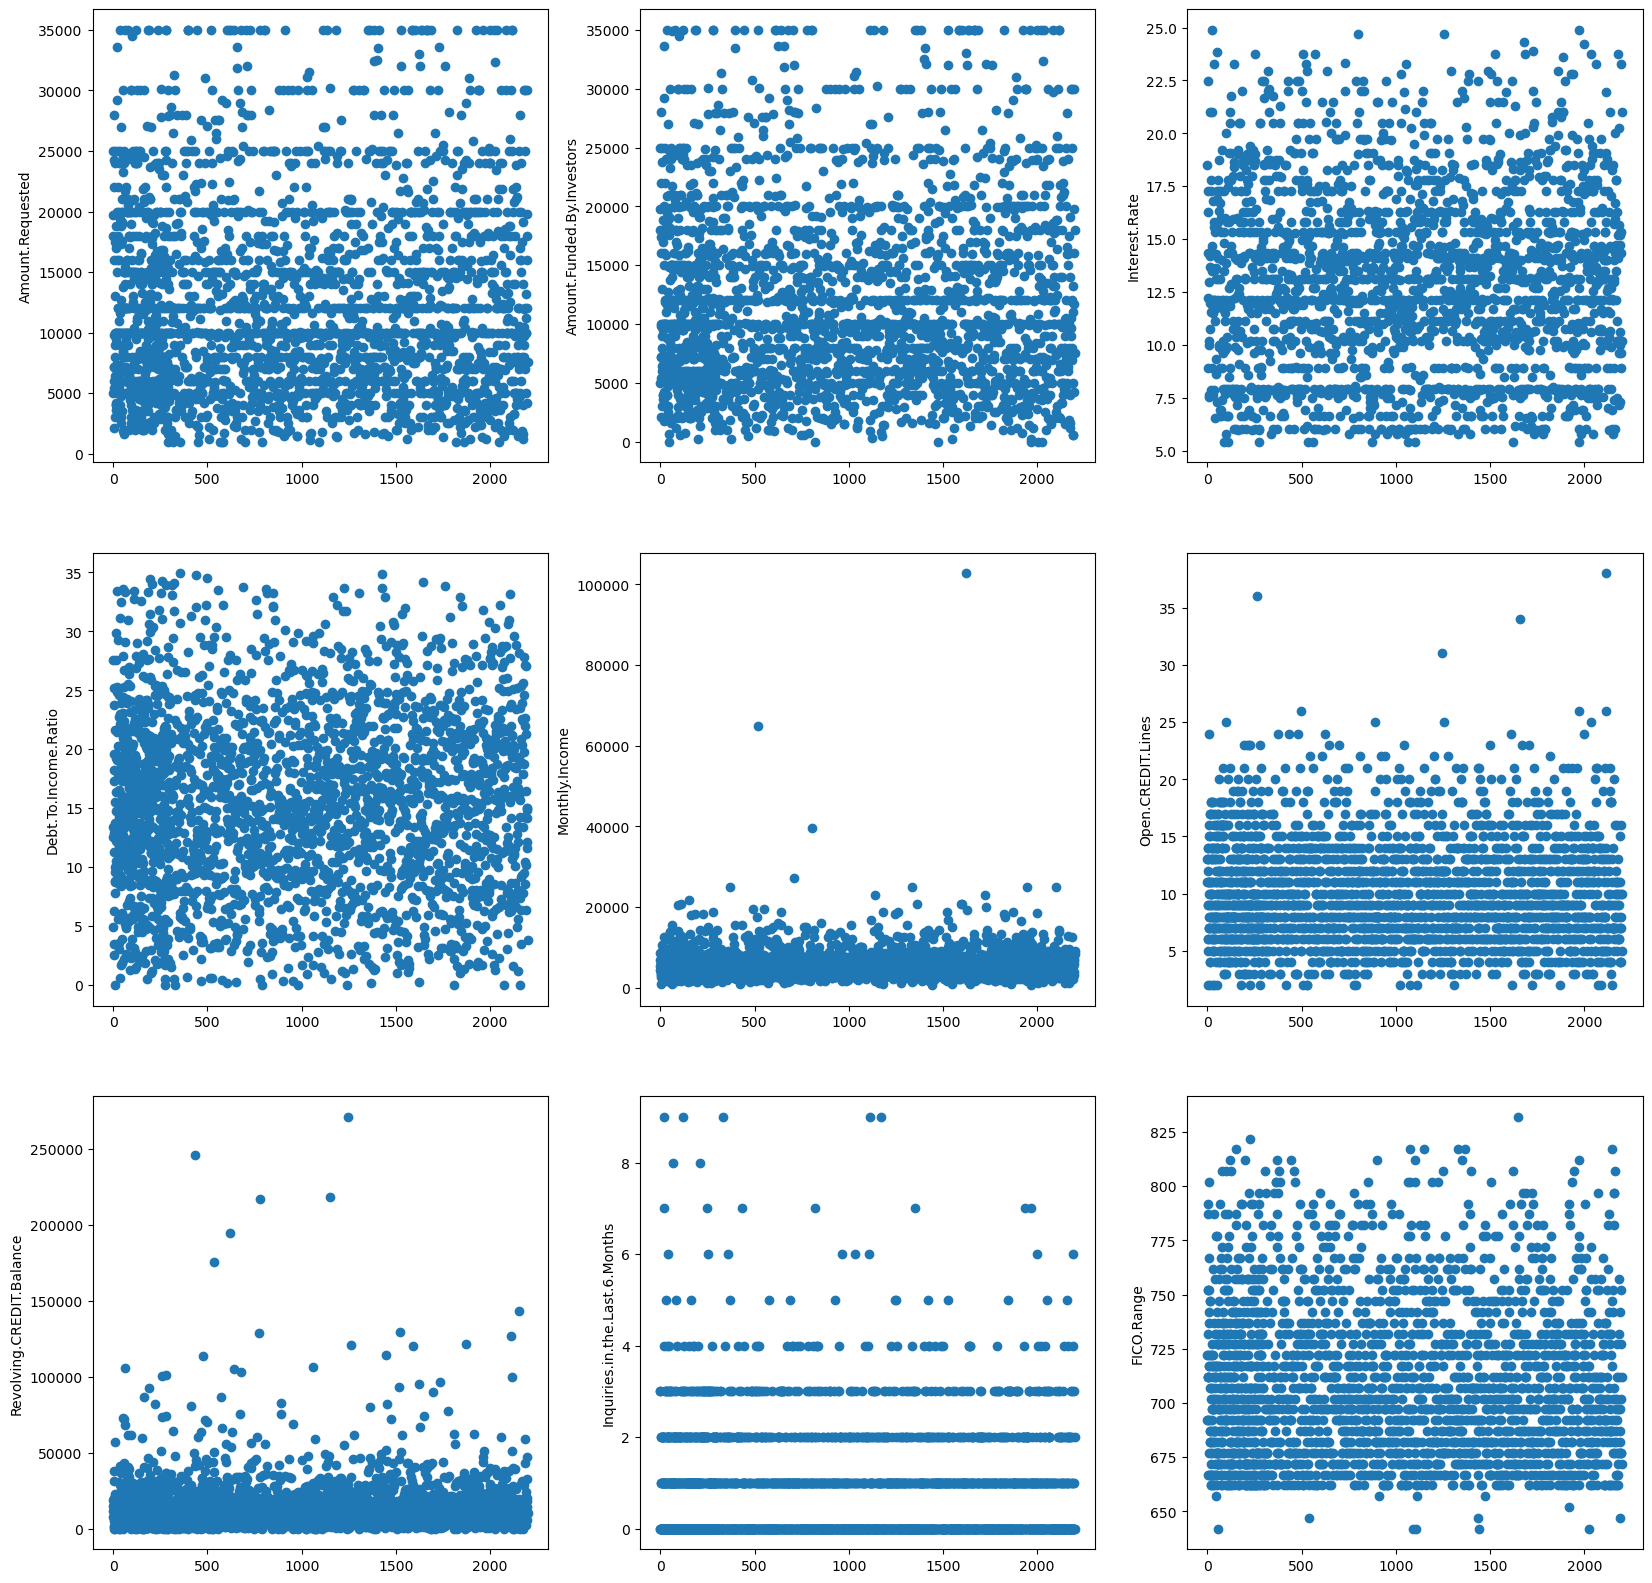

In [ ]:
genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'FICO.Range']

numeric_cols = ld_all.loc[:,genuine_numeric_cols] ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=[numeric_cols.index])
        ax[row_count][col_count].set_ylabel(genuine_numeric_cols[col_index])
        col_index = col_index + 1

In [ ]:
ld_all.loc[ld_all['Monthly.Income']>=30000, 'Monthly.Income']=30000

In [ ]:
ld_all.loc[ld_all['Revolving.CREDIT.Balance']>=150000, 'Revolving.CREDIT.Balance']=150000

In [ ]:
ld_all.loc[ld_all['Open.CREDIT.Lines']>=25, 'Open.CREDIT.Lines']=25

In [ ]:
ld_all.describe()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,HO_MORTGAGE,...,state_SC,state_SD,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,2500.000000,2500.000000,2200.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12407.590000,12003.413236,13.051218,15.376252,5641.955616,707.888000,10.062000,15076.994400,0.905600,0.461200,...,0.011200,0.001600,0.069600,0.00640,0.031200,0.002000,0.023200,0.010400,0.005600,0.001600
std,7798.507923,7726.823793,4.173349,7.504721,3280.494417,35.033161,4.427866,16592.935942,1.230811,0.498592,...,0.105257,0.039976,0.254523,0.07976,0.173893,0.044686,0.150568,0.101469,0.074638,0.039976
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,642.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,9.747500,3500.000000,682.000000,7.000000,5605.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,10000.000000,13.110000,15.310000,5000.000000,702.000000,9.000000,10981.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17000.000000,16000.000000,15.800000,20.672500,6800.000000,727.000000,13.000000,18870.250000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,24.890000,34.910000,30000.000000,832.000000,25.000000,150000.000000,9.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ld_all.loc[ld_all['Amount.Funded.By.Investors']<=0, 'Amount.Funded.By.Investors']=0

In [ ]:
genuine_numeric_cols=['Amount.Requested','Amount.Funded.By.Investors', 'Interest.Rate', 'Debt.To.Income.Ratio', 'Open.CREDIT.Lines', 'FICO.Range','Monthly.Income', 'Revolving.CREDIT.Balance','Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months']
numeric_cols_new=ld_all.loc[:, genuine_numeric_cols]
numeric_cols_new.corr()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,FICO.Range,Monthly.Income,Revolving.CREDIT.Balance,Open.CREDIT.Lines,Inquiries.in.the.Last.6.Months
Amount.Requested,1.000000,0.967081,0.330082,0.082135,0.195496,0.082281,0.448126,0.312561,0.195496,-0.027455
Amount.Funded.By.Investors,0.967081,1.000000,0.335200,0.096492,0.187051,0.070758,0.425980,0.291079,0.187051,-0.066544
Interest.Rate,0.330082,0.335200,1.000000,0.177830,0.088882,-0.708394,0.029569,0.068946,0.088882,0.169779
Debt.To.Income.Ratio,0.082135,0.096492,0.177830,1.000000,0.370544,-0.218153,-0.171082,0.200761,0.370544,0.012593
Open.CREDIT.Lines,0.195496,0.187051,0.088882,0.370544,1.000000,-0.090449,0.212954,0.291788,1.000000,0.109304
FICO.Range,0.082281,0.070758,-0.708394,-0.218153,-0.090449,1.000000,0.118739,0.000626,-0.090449,-0.092622
Monthly.Income,0.448126,0.425980,0.029569,-0.171082,0.212954,0.118739,1.000000,0.408644,0.212954,0.035631
Revolving.CREDIT.Balance,0.312561,0.291079,0.068946,0.200761,0.291788,0.000626,0.408644,1.000000,0.291788,-0.008654
Open.CREDIT.Lines,0.195496,0.187051,0.088882,0.370544,1.000000,-0.090449,0.212954,0.291788,1.000000,0.109304
Inquiries.in.the.Last.6.Months,-0.027455,-0.066544,0.169779,0.012593,0.109304,-0.092622,0.035631,-0.008654,0.109304,1.000000


<AxesSubplot:>

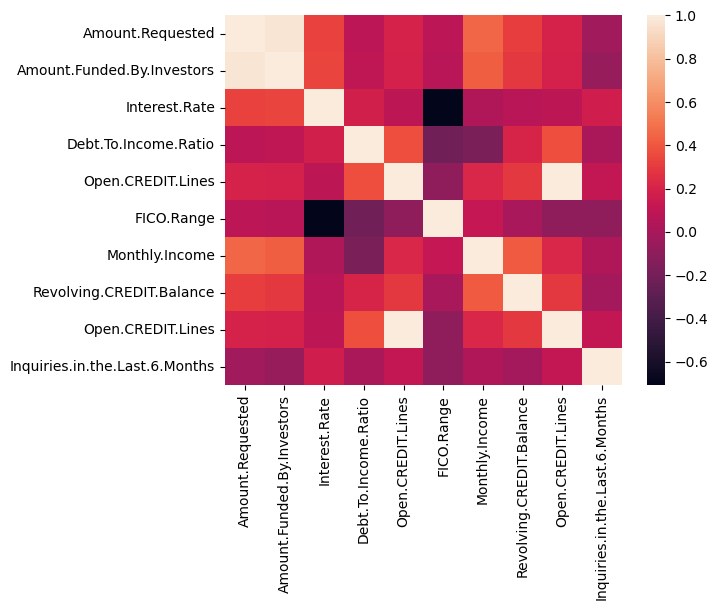

In [ ]:
sns.heatmap(numeric_cols_new.corr())

In [ ]:
ld_all.drop(['Amount.Funded.By.Investors'],axis=1,inplace=True)

In [ ]:
ld_all.shape

(2500, 87)

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 87 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2500 non-null   float64
 1   Interest.Rate                    2200 non-null   float64
 2   Debt.To.Income.Ratio             2500 non-null   float64
 3   Monthly.Income                   2500 non-null   float64
 4   FICO.Range                       2500 non-null   float64
 5   Open.CREDIT.Lines                2500 non-null   float64
 6   Revolving.CREDIT.Balance         2500 non-null   float64
 7   Inquiries.in.the.Last.6.Months   2500 non-null   float64
 8   coming from                      2500 non-null   object 
 9   HO_MORTGAGE                      2500 non-null   uint8  
 10  HO_OWN                           2500 non-null   uint8  
 11  HO_RENT                          2500 non-null   uint8  
 12  Loan_purpose_car     

In [ ]:
ld_train = ld_all.loc[ld_all['coming from']=='train']

del ld_train['coming from']

ld_test = ld_all.loc[ld_all['coming from']=='test']

ld_test.drop(['Interest.Rate','coming from'],axis=1,inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_12992\2044088477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_test.drop(['Interest.Rate','coming from'],axis=1,inplace=True)


In [ ]:
ld_train.shape, ld_test.shape

((2200, 86), (300, 85))

In [ ]:
del ld_all

Modelling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ld_train_new, ld_val = train_test_split(ld_train, test_size=0.1, random_state=1234)

In [ ]:
ld_train_new.shape,ld_val.shape

((1980, 86), (220, 86))

In [ ]:
train_features=ld_train_new.drop('Interest.Rate', axis=1)

In [ ]:
train_target=ld_train_new['Interest.Rate']

In [ ]:
val_features=ld_val.drop('Interest.Rate', axis=1)

In [ ]:
val_target=ld_val['Interest.Rate']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm= LinearRegression()

In [ ]:
lm.fit(X= train_features, y= train_target)

LinearRegression()

In [ ]:
train_features.shape

(1980, 85)

In [ ]:
lm.coef_

array([ 1.68624466e-04,  7.24001147e-04, -3.69673049e-05, -8.65654150e-02,
       -4.05066922e-02, -3.87063309e-06,  3.52338874e-01, -1.90503065e-01,
        1.56518879e-01,  3.39841865e-02, -3.16845119e-01, -4.82675288e-01,
       -4.38255724e-01,  4.01778712e-01, -3.40551564e-01,  3.10120171e-01,
        6.15623965e-03, -1.93665439e-01,  8.42600661e-01,  3.25478938e-01,
        2.86446602e-02, -1.86404272e-03,  5.74085454e-01, -7.15007658e-01,
       -5.69507941e-01, -3.90215577e-01, -6.54444835e-02, -2.73474221e-01,
       -3.51768015e-01, -8.18276912e-02, -8.24995827e-02, -1.82321249e-01,
       -1.87426333e-01, -4.41083042e-01, -3.95036650e-01, -2.01136693e-01,
       -1.55639671e+00,  1.55639671e+00, -2.80605254e+00, -1.24392164e+00,
       -3.59093489e+00, -3.68676813e+00, -3.22848422e+00, -3.75480486e+00,
       -3.40348163e+00, -3.09766657e+00, -4.23765032e+00, -4.15962053e+00,
       -3.69076045e+00, -3.57585026e+00, -2.98585475e+00,  2.90878432e-14,
       -4.06667558e+00, -

In [ ]:
lm.intercept_

77.70126297395211

In [ ]:
model_parameters= dict(zip(train_features.columns, lm.coef_))

In [ ]:
model_parameters

{'Amount.Requested': 0.0001686244655364378,
 'Debt.To.Income.Ratio': 0.0007240011471005866,
 'Monthly.Income': -3.696730491612367e-05,
 'FICO.Range': -0.08656541504320939,
 'Open.CREDIT.Lines': -0.040506692190119487,
 'Revolving.CREDIT.Balance': -3.870633087821318e-06,
 'Inquiries.in.the.Last.6.Months': 0.3523388742938272,
 'HO_MORTGAGE': -0.19050306519408983,
 'HO_OWN': 0.15651887884650206,
 'HO_RENT': 0.0339841864563179,
 'Loan_purpose_car': -0.31684511900000456,
 'Loan_purpose_credit_card': -0.48267528833810686,
 'Loan_purpose_debt_consolidation': -0.4382557239082401,
 'Loan_purpose_educational': 0.40177871194097914,
 'Loan_purpose_home_improvement': -0.340551564269892,
 'Loan_purpose_house': 0.31012017125393165,
 'Loan_purpose_major_purchase': 0.006156239646412834,
 'Loan_purpose_medical': -0.1936654392194543,
 'Loan_purpose_moving': 0.8426006606510852,
 'Loan_purpose_other': 0.32547893836726116,
 'Loan_purpose_renewable_energy': 0.02864466016960073,
 'Loan_purpose_small_business':

In [ ]:
train_predictions=lm.predict(train_features)

In [ ]:
val_predictions=lm.predict(val_features)

In [ ]:
train_predictions.shape, val_predictions.shape

((1980,), (220,))

In [ ]:
train_results=pd.DataFrame({'Actuals': train_target, 'Predictions': train_predictions})

In [ ]:
val_results= pd.DataFrame({'Actuals':val_target, 'Predictions': val_predictions})

In [ ]:
train_results

,Actuals,Predictions
1958,9.91,10.722206
1984,14.33,8.541285
142,18.39,14.402928
1711,15.80,15.310615
1859,22.95,14.982921
...,...,...
279,20.49,16.855993
2041,14.09,17.063424
664,13.11,14.423592
1318,11.71,13.059432


In [ ]:
val_results

,Actuals,Predictions
1835,14.59,14.054264
1821,11.71,11.689424
1934,9.76,11.623891
1622,15.62,14.971991
789,11.99,14.059239
...,...,...
1177,7.90,8.797747
881,19.05,18.597109
397,15.31,15.429506
1365,13.99,12.990573


In [ ]:
def MAPE(target_vector, predicted_vector):
    error_vect = (target_vector - predicted_vector)
    percent_error_vect = (error_vect/target_vector)*100
    percent_abs_error_vect = np.absolute(percent_error_vect)
    mean_abs_percentage_error = np.mean(percent_abs_error_vect)
    return(mean_abs_percentage_error)

In [ ]:
train_MAPE = MAPE(train_target, train_predictions)
val_MAPE= MAPE(val_target, val_predictions)

print('Train_MAPE:', train_MAPE)
print('Val_MAPE:', val_MAPE)

Train_MAPE: 13.397298213983984
Val_MAPE: 13.930509390757697


In [ ]:
import pickle

with open('mymodel1.pickle','wb') as i:
    pickle.dump(lm,i)